# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset Kesejahteraan Pekerja Indonesia (https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia/data)
   
2. **Ketentuan Dataset**:
   - Dataset ini tidak memiliki label atau kelas.
   - Jumlah Baris : 4620 baris
   - Jumlah Kolom : 5
   - Tipe Data:
     - Kategorikal: Daerah, Jenis
     - Numerikal: Tahun, Pengeluaran

3. **Pembatasan**:  
   Dataset yang digunakan adalah data pengeluaran.csv

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('/content/dataset_clustering.csv')
df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

# Memahami Struktur Data

In [3]:
# Info awal
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None
       provinsi     daerah    jenis        tahun          peng
count      4620       4620     4620  4620.000000  4.512000e+03
unique       35          3        3          NaN           NaN
top        ACEH  PERDESAAN  MAKANAN          NaN           NaN
freq        132       1680     1540          NaN           NaN
mean        NaN        NaN      NaN  2015.045455  6.012012e+05
std         NaN        NaN      NaN     4.416124  3.524052e+05
min         NaN        NaN      NaN  2007.000000  5.921600e+04
25%         NaN        NaN      NaN  2011.750000

# Menangani Data yang Hilang

In [4]:
# Cek dan tangani missing values
print("\nMissing values per kolom sebelum dibersihkan:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("\nMissing values setelah dibersihkan:")
print(df.isnull().sum())


Missing values per kolom sebelum dibersihkan:
provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

Missing values setelah dibersihkan:
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64


# Analisis Distribusi dan Korelasi

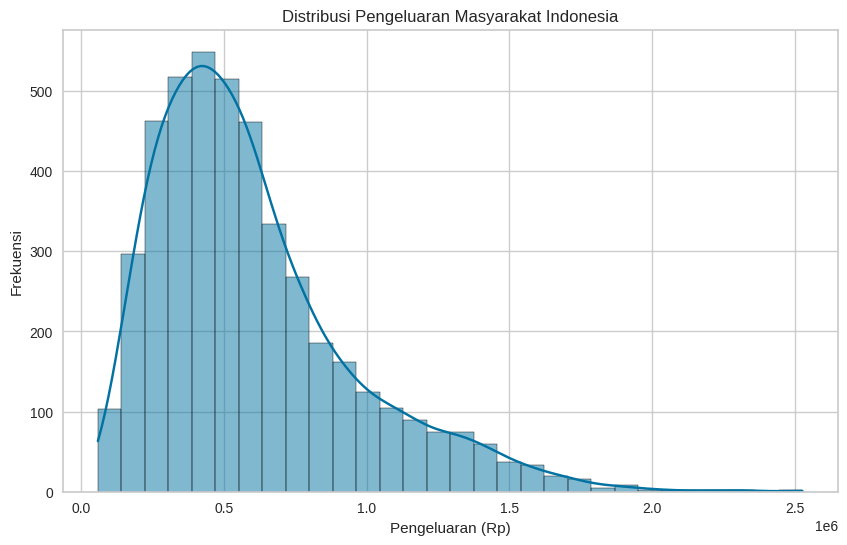

In [5]:
# Visualisasi distribusi pengeluaran
plt.figure(figsize=(10, 6))
sns.histplot(df['peng'], bins=30, kde=True)
plt.title('Distribusi Pengeluaran Masyarakat Indonesia')
plt.xlabel('Pengeluaran (Rp)')
plt.ylabel('Frekuensi')
plt.show()

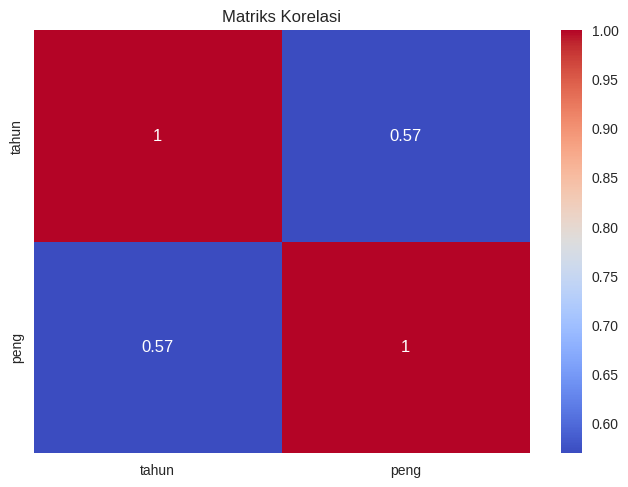

In [6]:
# Korelasi antar variabel numerik
sns.heatmap(df[['tahun', 'peng']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

# Visualisasi Data

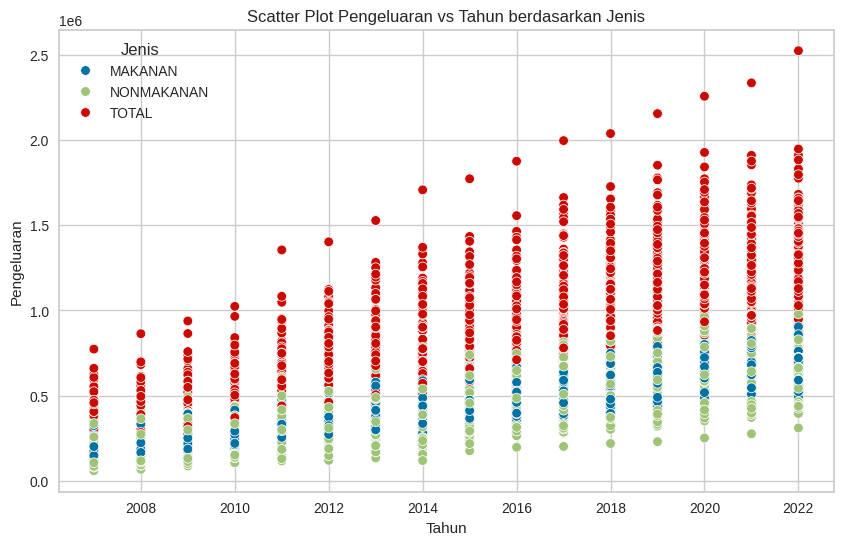

In [7]:
# Scatter plot dengan hue berdasarkan 'jenis'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tahun', y='peng', hue='jenis')
plt.title("Scatter Plot Pengeluaran vs Tahun berdasarkan Jenis")
plt.xlabel("Tahun")
plt.ylabel("Pengeluaran")
plt.legend(title="Jenis")
plt.show()

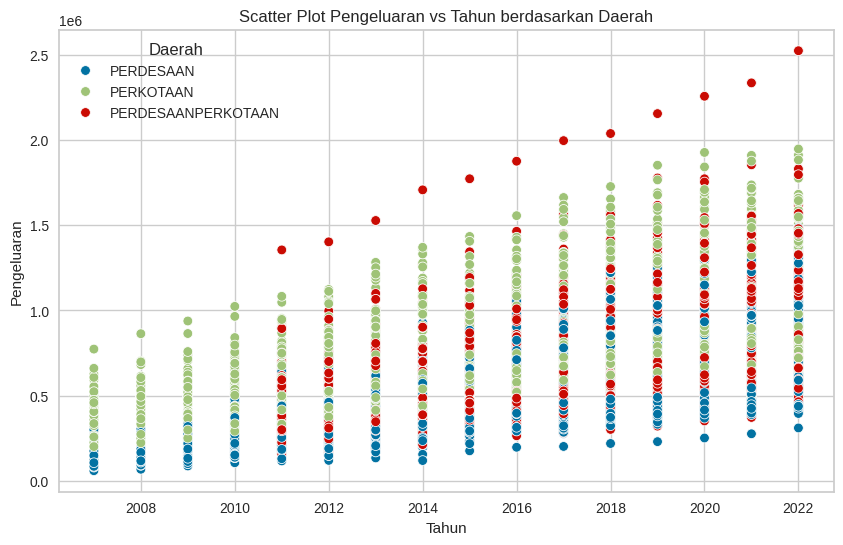

In [8]:
# Scatter plot dengan hue berdasarkan 'daerah'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tahun', y='peng', hue='daerah')
plt.title("Scatter Plot Pengeluaran vs Tahun berdasarkan Daerah")
plt.xlabel("Tahun")
plt.ylabel("Pengeluaran")
plt.legend(title="Daerah")
plt.show()

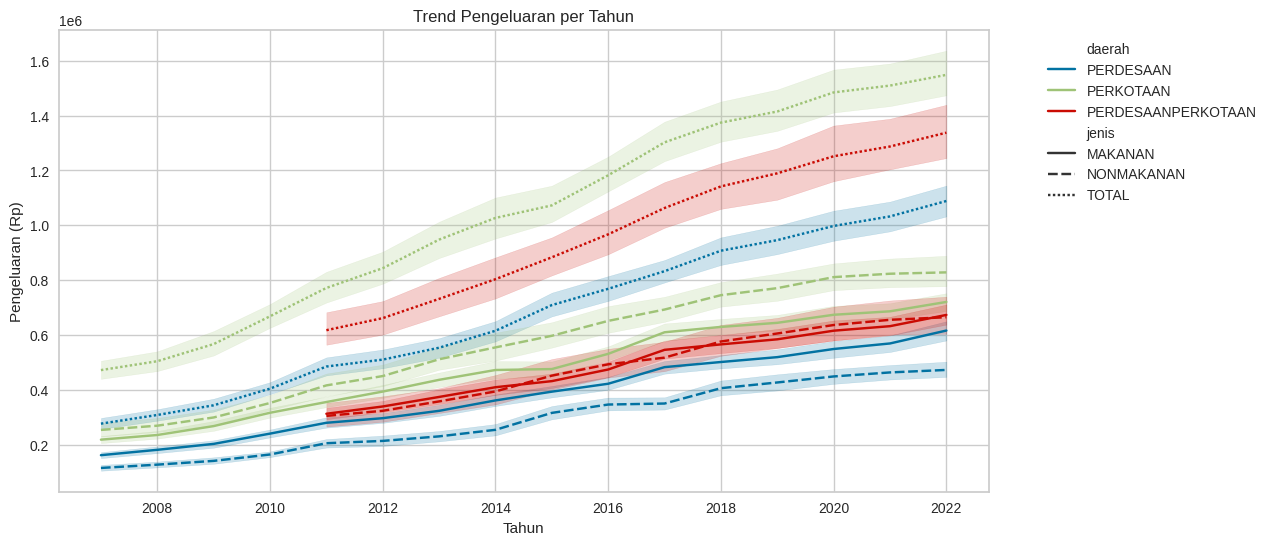

In [9]:
# Pengeluaran per tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tahun', y='peng', hue='daerah', style='jenis')
plt.title('Trend Pengeluaran per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Pengeluaran (Rp)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

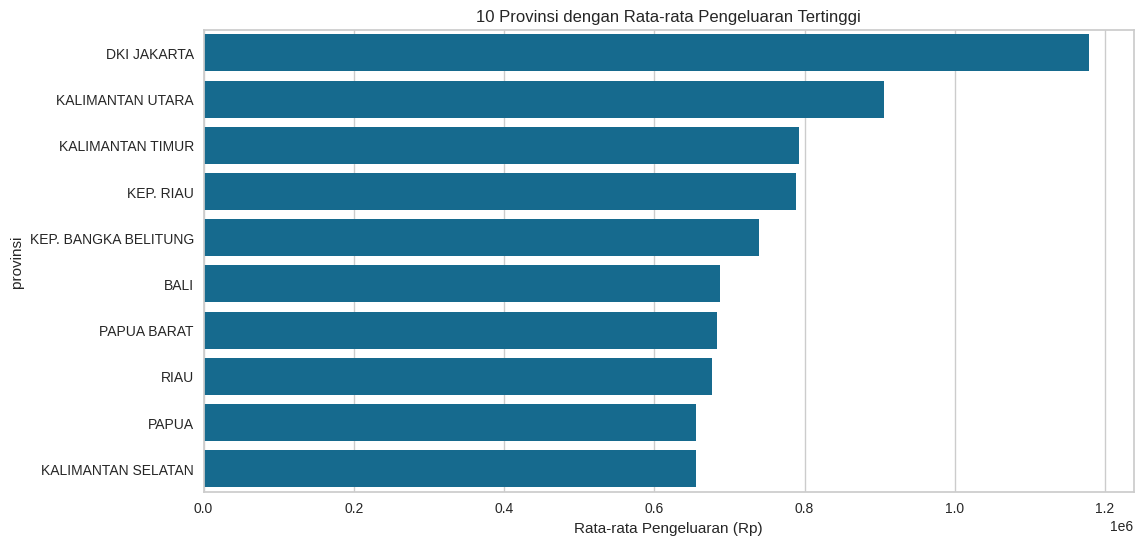

In [10]:
# Pengeluaran per provinsi (top 10)
plt.figure(figsize=(12, 6))
top_prov = df.groupby('provinsi')['peng'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_prov.values, y=top_prov.index)
plt.title('10 Provinsi dengan Rata-rata Pengeluaran Tertinggi')
plt.xlabel('Rata-rata Pengeluaran (Rp)')
plt.show()

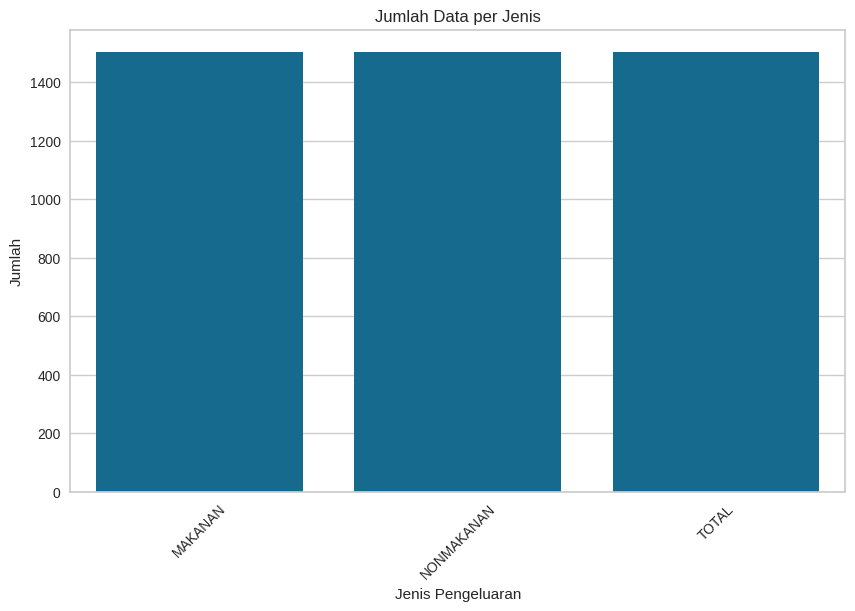

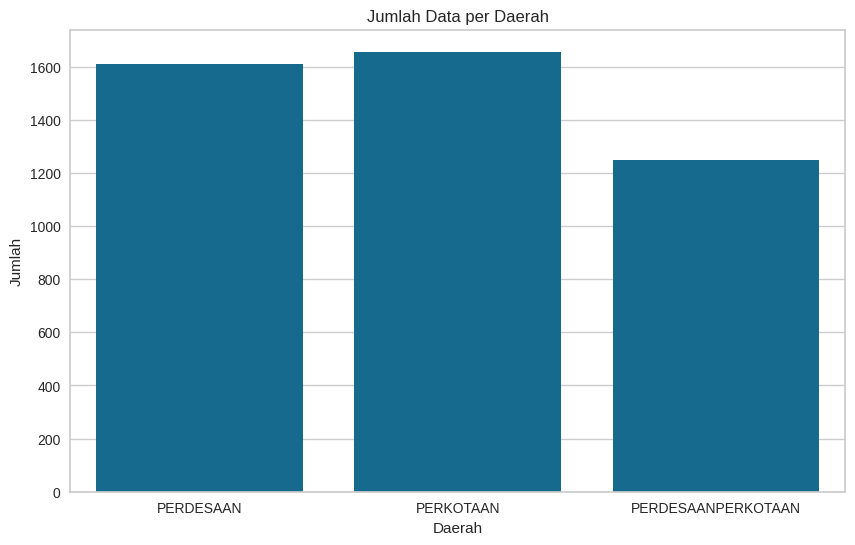

In [11]:
# --- Diagram batang variabel kategorikal ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='jenis', order=df['jenis'].value_counts().index)
plt.title("Jumlah Data per Jenis")
plt.xlabel("Jenis Pengeluaran")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='daerah')
plt.title("Jumlah Data per Daerah")
plt.xlabel("Daerah")
plt.ylabel("Jumlah")
plt.show()

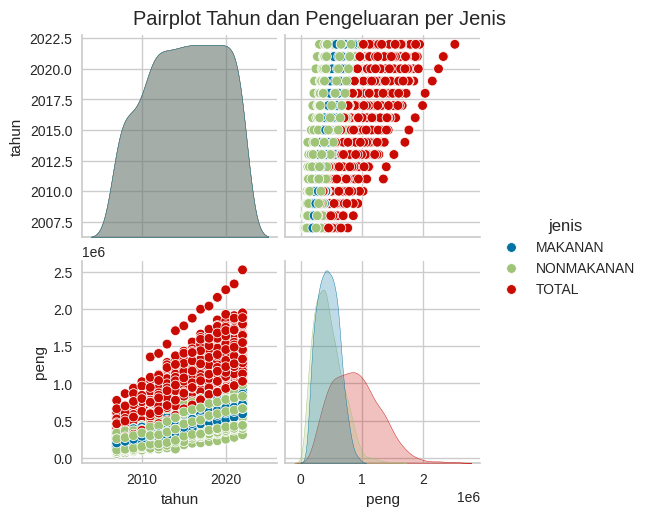

In [12]:
# Pairplot untuk eksplorasi hubungan antar variabel
sns.pairplot(df, hue='jenis', vars=['tahun', 'peng'])
plt.suptitle("Pairplot Tahun dan Pengeluaran per Jenis", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

# Menghapus atau Menangani Data Kosong (Missing Values)

In [13]:
df.isnull().sum()  # Cek jumlah nilai kosong per kolom

,0
provinsi,0
daerah,0
jenis,0
tahun,0
peng,0


# Menghapus Data Duplikat

In [14]:
df.duplicated().sum()     # Cek jumlah duplikasi
df = df.drop_duplicates() # Hapus duplikat

# Deteksi dan Penanganan Outlier


In [15]:
Q1 = df['peng'].quantile(0.25)
Q3 = df['peng'].quantile(0.75)
IQR = Q3 - Q1

# Filter outlier
df = df[(df['peng'] >= Q1 - 1.5 * IQR) & (df['peng'] <= Q3 + 1.5 * IQR)]

In [16]:
df.shape

(4320, 5)

## Membuat Data Aggregat per Provinsi

In [17]:
# Feature Engineering
df['rata_pengeluaran'] = df.groupby('provinsi')['peng'].transform('mean')
df['variasi_pengeluaran'] = df.groupby('provinsi')['peng'].transform('std')
df['variasi_pengeluaran'] = df['variasi_pengeluaran'].fillna(0)

In [18]:
# Data untuk clustering
X = df[['rata_pengeluaran', 'variasi_pengeluaran']]

# **Scalling**

In [19]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-0.29536228, -0.16626088],
       [-0.29536228, -0.16626088],
       [-0.29536228, -0.16626088],
       ...,
       [-0.12666504,  0.4945063 ],
       [-0.12666504,  0.4945063 ],
       [-0.12666504,  0.4945063 ]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

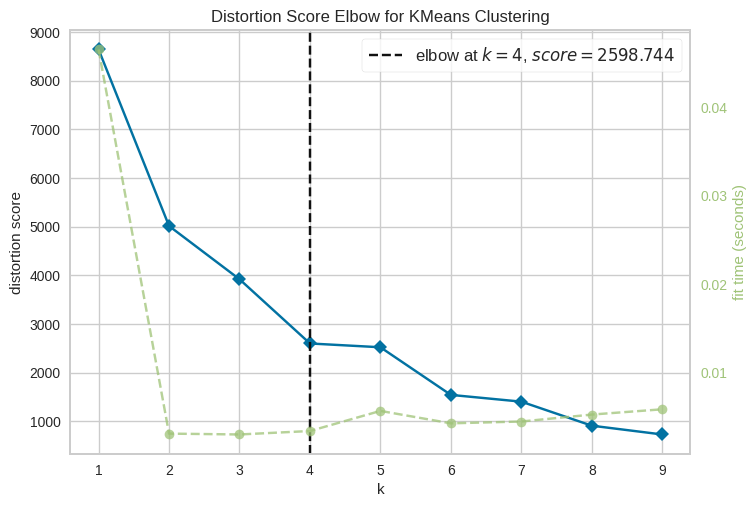

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_scaled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Didapatkan jumlah kluster optimal sebesar 4

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

K=2, Silhouette Score=0.4186
K=3, Silhouette Score=0.3982
K=4, Silhouette Score=0.4324
K=5, Silhouette Score=0.4235


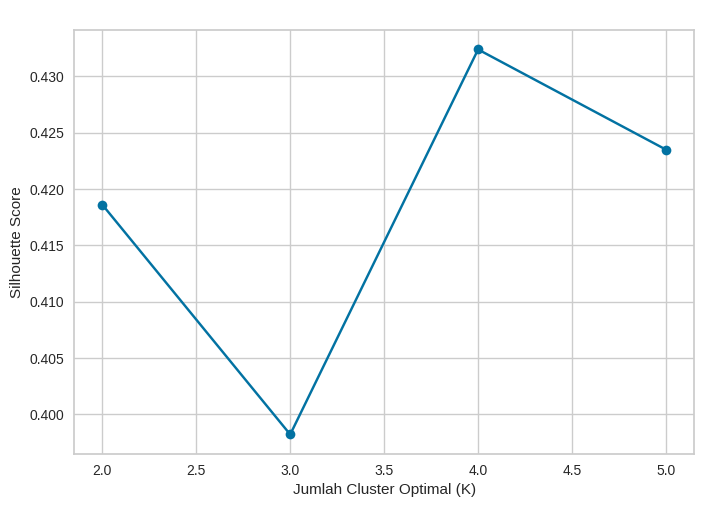

In [23]:
# Range K
range_k = range(2, 6)
scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Plot
plt.plot(range_k, scores, marker='o')
plt.xlabel('Jumlah Cluster Optimal (K)')
plt.ylabel('Silhouette Score')
plt.title(' ')
plt.grid(True)
plt.show()


### Penentuan Jumlah Cluster Optimal

Dalam proses clustering data pengeluaran masyarakat Indonesia berdasarkan provinsi, dilakukan dua metode evaluasi untuk menentukan jumlah cluster yang optimal, yaitu **Elbow Method** dan **Silhouette Score**.

#### 1. **Elbow Method**

Metode ini digunakan untuk menentukan jumlah cluster optimal dengan cara mengamati nilai **distortion** (dalam hal ini, **Sum of Squared Errors / SSE**) terhadap variasi jumlah cluster. Tujuannya adalah mencari titik “tekukan” (elbow), yaitu titik di mana penurunan SSE mulai melambat secara signifikan.

> Dari hasil visualisasi elbow, diperoleh bahwa **k = 4** merupakan titik tekukan optimal.

#### 2. **Silhouette Score**

Silhouette Score digunakan untuk mengevaluasi seberapa baik data dikelompokkan dalam cluster. Skor ini berkisar dari -1 hingga 1, dengan nilai lebih tinggi menunjukkan pemisahan cluster yang lebih jelas dan kohesi internal yang lebih kuat.

> Hasil evaluasi menunjukkan bahwa nilai tertinggi diperoleh pada k = 4, dengan skor>0.430 — artinya struktur cluster yang terbentuk cukup baik.  

###  Kesimpulan dan Keputusan


> Berdasarkan evaluasi tersebut, saya memutuskan untuk menggunakan jumlah cluster **k = 4** sebagai konfigurasi optimal karena memiliki struktur clustering terbaik dengan nilai elbow method dan silhouette yang pas.



In [24]:
# Clustering final dengan 4 cluster
kmeans_final = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans_final.fit_predict(X)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [25]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

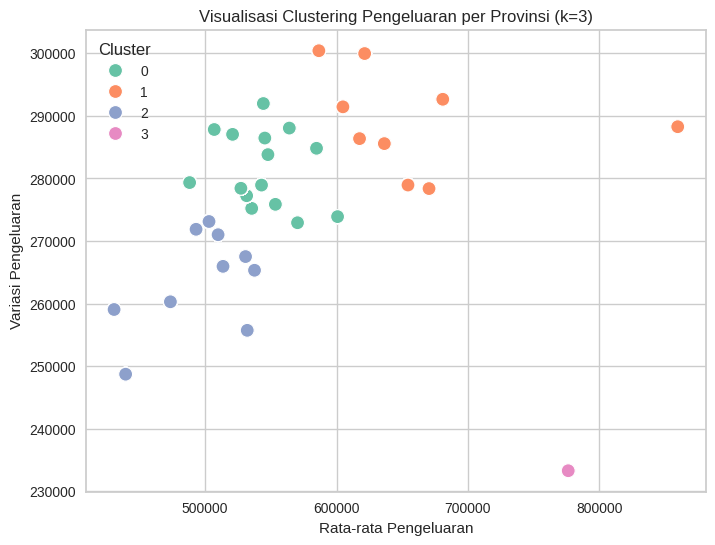

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Menentukan jumlah cluster optimal (k = 4)
optimal_k = 4

# Melakukan clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rata_pengeluaran', y='variasi_pengeluaran', hue='cluster', palette='Set2', s=100, marker='o')
plt.title('Visualisasi Clustering Pengeluaran per Provinsi (k=3)')
plt.xlabel('Rata-rata Pengeluaran')
plt.ylabel('Variasi Pengeluaran')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [27]:
print(df[['rata_pengeluaran', 'variasi_pengeluaran']].describe())

       rata_pengeluaran  variasi_pengeluaran
count       4320.000000          4320.000000
mean      557072.164583        277377.034315
std        73147.236331         13013.772024
min       430750.719697        233257.109051
25%       513637.434109        271001.613547
50%       542935.048387        278424.961534
75%       600794.129032        286461.053747
max       859616.637931        300426.211544


In [28]:
# Cluster Centers (original scale)
cluster_centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers,
                         columns=['rata_pengeluaran', 'variasi_pengeluaran'],
                         index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
print("\nPusat Cluster (Skala Asli):")
print(centers_df)


Pusat Cluster (Skala Asli):
           rata_pengeluaran  variasi_pengeluaran
Cluster 0      3.873893e+10         3.601317e+09
Cluster 1      4.571563e+10         3.738306e+09
Cluster 2      5.977346e+10         3.387360e+09
Cluster 3      3.276401e+10         3.331461e+09


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [29]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
# Statistik Cluster
cluster_stats = df.groupby('cluster').agg({
    'rata_pengeluaran': ['mean', 'min', 'max'],
    'variasi_pengeluaran': ['mean', 'min', 'max'],
    'provinsi': 'count'
}).reset_index()

print("\nKarakteristik Cluster:")
print(cluster_stats)


Karakteristik Cluster:
  cluster rata_pengeluaran                               variasi_pengeluaran  \
                      mean            min            max                mean   
0       0    543800.156914  488224.325758  600794.129032       281523.231707   
1       1    646157.161009  586568.560976  859616.637931       289238.490848   
2       2    495922.559322  430750.719697  537598.787402       263826.746692   
3       3    776302.216667  776302.216667  776302.216667       233257.109051   

                                provinsi  
             min            max    count  
0  272916.735294  291981.355518     1931  
1  278379.083153  300426.211544     1031  
2  248694.179228  273114.851477     1298  
3  233257.109051  233257.109051       60  


In [31]:
# Statistik tiap cluster (Versi 4 Cluster Terurut)
cluster_stats = df.groupby('cluster').agg(
    rata_pengeluaran=('rata_pengeluaran', 'mean'),
    min_peng=('rata_pengeluaran', 'min'),
    max_peng=('rata_pengeluaran', 'max'),
    variasi_mean=('variasi_pengeluaran', 'mean'),
    variasi_min=('variasi_pengeluaran', 'min'),
    variasi_max=('variasi_pengeluaran', 'max'),
    jumlah_provinsi=('provinsi', pd.Series.nunique)
).reset_index()

cluster_stats = cluster_stats.sort_values('rata_pengeluaran').reset_index(drop=True)
cluster_stats['cluster'] = range(len(cluster_stats))

# Update cluster di dataframe utama
df['cluster'] = df['cluster'].map(dict(zip(cluster_stats['cluster'].values, range(len(cluster_stats)))))

# Analisis tiap cluster (Versi 4 Cluster Terurut)
print("\n Analisis Karakteristik 4 Cluster (Terendah ke Tertinggi)\n")
for _, row in cluster_stats.iterrows():
    cid = row['cluster']
    print(f"\nCLUSTER {cid} ")
    print(f"Rata-rata Pengeluaran: Rp{row['rata_pengeluaran']:,.0f}")
    print(f"Rentang Pengeluaran: Rp{row['min_peng']:,.0f} - Rp{row['max_peng']:,.0f}")
    print(f"Variasi Pengeluaran: Rp{row['variasi_mean']:,.0f} (Rp{row['variasi_min']:,.0f} - Rp{row['variasi_max']:,.0f})")
    print(f"Jumlah Provinsi: {row['jumlah_provinsi']}")

    # Analisis naratif untuk 4 cluster
    print("\nKarakteristik:")
    if cid == 0:
        print("KATEGORI: PENGELUARAN SANGAT RENDAH")
        print("• Rata-rata pengeluaran di bawah Rp500.000")
        print("• Prioritas program bantuan sosial dan subsidi")
    elif cid == 1:
        print("KATEGORI: PENGELUARAN RENDAH-MENENGAH")
        print("• Rata-rata pengeluaran Rp500.000 - Rp600.000")
        print("• Fokus pengembangan UMKM dan pelatihan keterampilan")
    elif cid == 2:
        print("KATEGORI: PENGELUARAN MENENGAH-TINGGI")
        print("• Rata-rata pengeluaran Rp600.000 - Rp700.000")
        print("• Pengembangan industri kecil dan menengah")
    else:
        print("KATEGORI: PENGELUARAN TINGGI")
        print("• Rata-rata pengeluaran di atas Rp700.000")
        print("• Potensi pengembangan sektor jasa dan ekonomi digital")

    # Daftar semua provinsi unik terurut alfabet
    provinsi_unik = sorted(df[df['cluster'] == cid]['provinsi'].unique())
    print(f"\nDaftar Lengkap Provinsi ({len(provinsi_unik)}):")
    print(", ".join(provinsi_unik))
    print("="*50)


 Analisis Karakteristik 4 Cluster (Terendah ke Tertinggi)


CLUSTER 0.0 
Rata-rata Pengeluaran: Rp495,923
Rentang Pengeluaran: Rp430,751 - Rp537,599
Variasi Pengeluaran: Rp263,827 (Rp248,694 - Rp273,115)
Jumlah Provinsi: 10.0

Karakteristik:
KATEGORI: PENGELUARAN SANGAT RENDAH
• Rata-rata pengeluaran di bawah Rp500.000
• Prioritas program bantuan sosial dan subsidi

Daftar Lengkap Provinsi (15):
ACEH, BANTEN, DI YOGYAKARTA, INDONESIA, JAMBI, JAWA BARAT, JAWA TIMUR, KALIMANTAN SELATAN, NUSA TENGGARA BARAT, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELATAN, SUMATERA UTARA

CLUSTER 1.0 
Rata-rata Pengeluaran: Rp543,800
Rentang Pengeluaran: Rp488,224 - Rp600,794
Variasi Pengeluaran: Rp281,523 (Rp272,917 - Rp291,981)
Jumlah Provinsi: 15.0

Karakteristik:
KATEGORI: PENGELUARAN RENDAH-MENENGAH
• Rata-rata pengeluaran Rp500.000 - Rp600.000
• Fokus pengembangan UMKM dan pelatihan keterampilan

Daftar Lengkap Provinsi (9):
BALI, DKI JAKARTA, KALIMANTAN TENGAH, 

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
df.to_csv('hasil_clustering.csv', index=False)
print("\nData hasil clustering telah disimpan sebagai 'hasil_clustering.csv'")


Data hasil clustering telah disimpan sebagai 'hasil_clustering.csv'
